# Account Y distribution analysis

In [1]:
# import all the libraries
import random
from itertools import combinations
import datetime as dt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy as ss
from statsmodels.stats.weightstats import ztest
import lib.helpers as hlp
# %matplotlib inline

total_results_dict = {'October': {}, 'September': {}, 'August': {}}

### Lets load data from /datasets folder to work with it

In [2]:
# read datasets to analyze
da_report_10_2019 = hlp.DATASETS_PATH + 'Accout_Y. Keywords data. 10_2019.csv'
da_report_09_2019 = hlp.DATASETS_PATH + 'Accout_Y. Keywords data. 09_2019.csv'
da_report_08_2019 = hlp.DATASETS_PATH + 'Accout_Y. Keywords data. 08_2019.csv'
df_10 = pd.read_csv(da_report_10_2019)
df_09 = pd.read_csv(da_report_09_2019)
df_08 = pd.read_csv(da_report_08_2019)

### Datasets cleaning and type conversion

In [3]:
data_types = {'Clicks': 'int', 'Impressions': 'int', 'Cost': 'float', 
              'CTR': 'float', 'Conv. value': 'float', 'All conv.': 'float',
              'Conversions': 'float', 'Cost / conv.': 'float', 'Conv. value / cost': 'float'}
rename_columns_dict = {'Cost / conv.': 'CPA', 'Conv. value / cost': 'ROAS'}
df_10.astype(data_types)
df_10.rename(columns=rename_columns_dict, inplace=True)
df_10.info()

df_09.astype(data_types)
df_09.rename(columns=rename_columns_dict, inplace=True)
df_09.info()

df_08.astype(data_types)
df_08.rename(columns=rename_columns_dict, inplace=True)
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 13 columns):
Search keyword    309 non-null object
Campaign          309 non-null object
Ad group          309 non-null object
Currency          309 non-null object
Clicks            309 non-null int64
Impressions       309 non-null int64
Cost              309 non-null float64
CTR               309 non-null float64
Conv. value       309 non-null float64
Conversions       309 non-null float64
All conv.         309 non-null float64
CPA               309 non-null float64
ROAS              309 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 31.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 13 columns):
Search keyword    423 non-null object
Campaign          423 non-null object
Ad group          423 non-null object
Currency          423 non-null object
Clicks            423 non-null int64
Impressions       423 non-null int64
Co

### Printing basic stats of datasets

In [4]:
print('Stats for October')
df_10.info()
print(df_10.describe())
print('#'*100)

print('Stats for September')
df_09.info()
print(df_09.describe())
print('#'*100)

print('Stats for August')
df_08.info()
print(df_08.describe())
print('#'*100)

Stats for October
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 13 columns):
Search keyword    309 non-null object
Campaign          309 non-null object
Ad group          309 non-null object
Currency          309 non-null object
Clicks            309 non-null int64
Impressions       309 non-null int64
Cost              309 non-null float64
CTR               309 non-null float64
Conv. value       309 non-null float64
Conversions       309 non-null float64
All conv.         309 non-null float64
CPA               309 non-null float64
ROAS              309 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 31.5+ KB
             Clicks    Impressions         Cost         CTR    Conv. value  \
count    309.000000     309.000000   309.000000  309.000000     309.000000   
mean    1610.724919    7616.378641   176.895858    0.221594    7281.096958   
std     6131.426391   18726.975025   482.516973    0.150721   32115.810519   
min

### Plot total distributions

[(0, 200)]

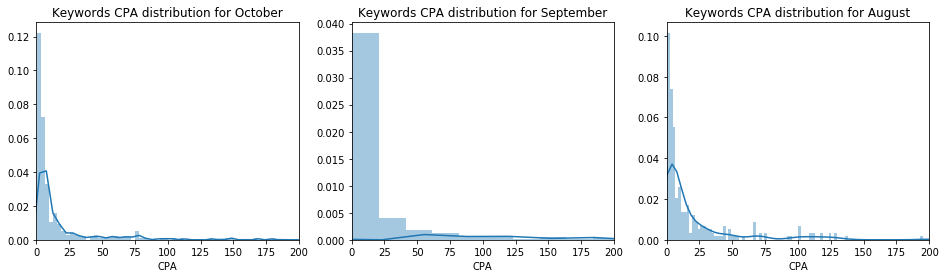

In [5]:
plot_column = 'CPA'
bins = 200
x_axis_range = (0, 200)

fig, ax = plt.subplots(1,3,figsize=(16, 4))

sns.distplot(df_10[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} distribution for October') 
sns.distplot(df_09[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} distribution for September')
sns.distplot(df_08[plot_column], bins=bins, ax=ax[2])\
    .set_title(f'Keywords {plot_column} distribution for August')

ax[0].set(xlim=x_axis_range)
ax[1].set(xlim=x_axis_range)
ax[2].set(xlim=x_axis_range)



[(0, 400)]

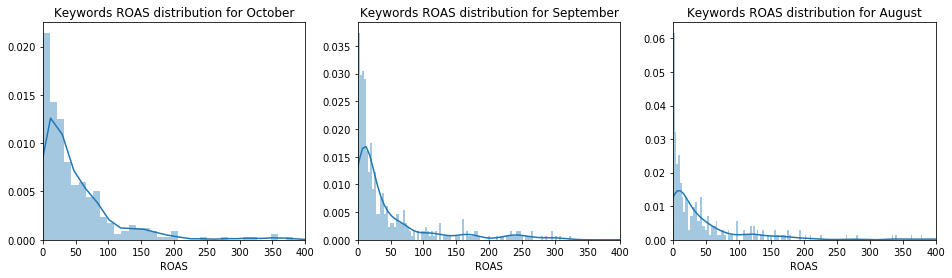

In [6]:
plot_column = 'ROAS'
bins = 200
x_axis_range = (0, 400)

fig, ax = plt.subplots(1,3,figsize=(16, 4))

sns.distplot(df_10[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} distribution for October') 
sns.distplot(df_09[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} distribution for September')
sns.distplot(df_08[plot_column], bins=bins, ax=ax[2])\
    .set_title(f'Keywords {plot_column} distribution for August')

ax[0].set(xlim=x_axis_range)
ax[1].set(xlim=x_axis_range)
ax[2].set(xlim=x_axis_range)

[(0, 3000)]

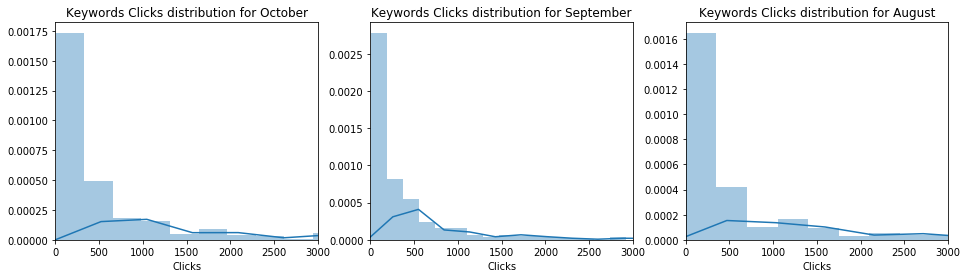

In [7]:
plot_column = 'Clicks'
bins = 200
x_axis_range = (0, 3000)

fig, ax = plt.subplots(1,3,figsize=(16, 4))

sns.distplot(df_10[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} distribution for October') 
sns.distplot(df_09[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} distribution for September')
sns.distplot(df_08[plot_column], bins=bins, ax=ax[2])\
    .set_title(f'Keywords {plot_column} distribution for August')

ax[0].set(xlim=x_axis_range)
ax[1].set(xlim=x_axis_range)
ax[2].set(xlim=x_axis_range)

### Lets in jump into comparison

In [8]:
df_10_brand = df_10[df_10['Campaign'].str.contains('Brand')]
df_09_brand = df_09[df_09['Campaign'].str.contains('Brand')]
df_08_brand = df_08[df_08['Campaign'].str.contains('Brand')]
print(df_10_brand.info(null_counts=True))
print('#'*100)
print(df_10_brand.describe(include='all'))
print('#'*100)
print(df_10_brand.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 308
Data columns (total 13 columns):
Search keyword    268 non-null object
Campaign          268 non-null object
Ad group          268 non-null object
Currency          268 non-null object
Clicks            268 non-null int64
Impressions       268 non-null int64
Cost              268 non-null float64
CTR               268 non-null float64
Conv. value       268 non-null float64
Conversions       268 non-null float64
All conv.         268 non-null float64
CPA               268 non-null float64
ROAS              268 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 29.3+ KB
None
####################################################################################################
            Search keyword          Campaign             Ad group Currency  \
count                  268               268                  268      268   
unique                   1                 1                    1      

In [9]:
df_10_generic = df_10[df_10['Campaign'].str.contains('Generic')]
df_09_generic = df_09[df_09['Campaign'].str.contains('Generic')]
df_08_generic = df_08[df_08['Campaign'].str.contains('Generic')]
print(df_08_generic.info(null_counts=True))
print('#'*100)
print(df_08_generic.describe(include='all'))
print('#'*100)
print(df_08_generic.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 9 to 271
Data columns (total 13 columns):
Search keyword    64 non-null object
Campaign          64 non-null object
Ad group          64 non-null object
Currency          64 non-null object
Clicks            64 non-null int64
Impressions       64 non-null int64
Cost              64 non-null float64
CTR               64 non-null float64
Conv. value       64 non-null float64
Conversions       64 non-null float64
All conv.         64 non-null float64
CPA               64 non-null float64
ROAS              64 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 7.0+ KB
None
####################################################################################################
            Search keyword            Campaign             Ad group Currency  \
count                   64                  64                   64       64   
unique                   1                   1                    1        1   
to

[(0, 0.15), (0, 200)]

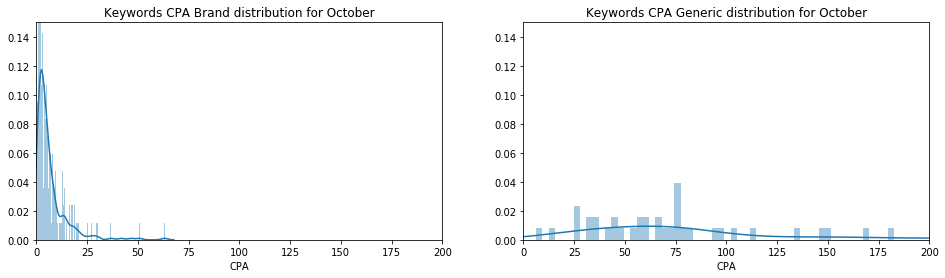

In [10]:
plot_column = 'CPA'
bins = 200
x_axis_range = (0, 200)
y_axis_range = (0, 0.15)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

sns.distplot(df_10_brand[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} Brand distribution for October') 
sns.distplot(df_10_generic[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} Generic distribution for October')
 

ax[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax[1].set(xlim=x_axis_range, ylim=y_axis_range)


[(0, 0.2), (0, 28)]

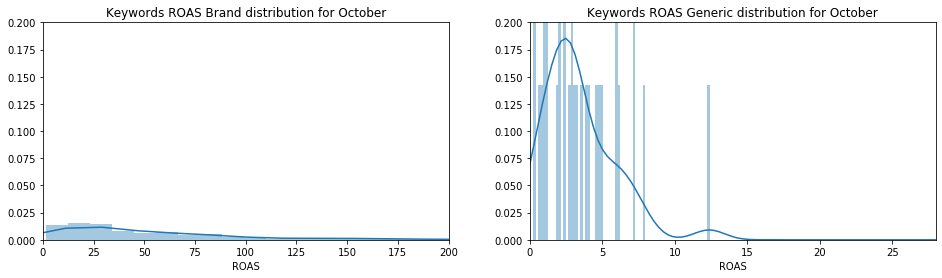

In [11]:
plot_column = 'ROAS'
bins = 200
x_axis_range = (0, 200)
y_axis_range = (0, 0.2)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

sns.distplot(df_10_brand[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} Brand distribution for October') 
sns.distplot(df_10_generic[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} Generic distribution for October')
 

ax[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax[1].set(xlim=(0, 28), ylim=y_axis_range)



[(0, 0.5), (0, 200)]

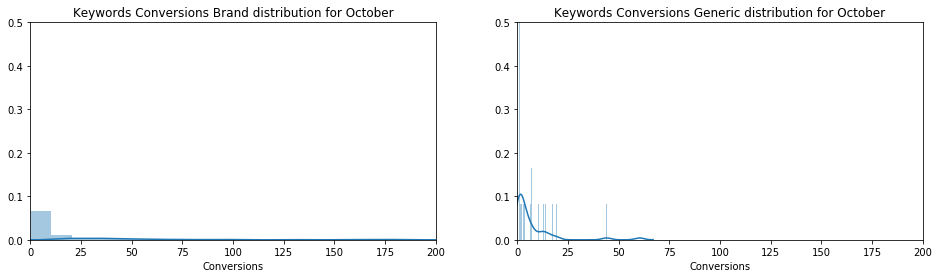

In [12]:
plot_column = 'Conversions'
bins = 200
x_axis_range = (0, 200)
y_axis_range = (0, 0.5)


fig, ax = plt.subplots(1,2,figsize=(16, 4))

sns.distplot(df_10_brand[plot_column], bins=bins, ax=ax[0])\
    .set_title(f'Keywords {plot_column} Brand distribution for October') 
sns.distplot(df_10_generic[plot_column], bins=bins, ax=ax[1])\
    .set_title(f'Keywords {plot_column} Generic distribution for October')
 
ax[0].set(xlim=x_axis_range, ylim=y_axis_range)
ax[1].set(xlim=x_axis_range, ylim=y_axis_range)


### Comparison for October

#### Lets prepare our dataframes to get tested

In [13]:
dfs = [df_10_brand, df_10_generic]
labels = ['Brand', 'Generic']
month = 'October'
cpa_arr_list = []

min_len = len(min(dfs, key=len))

for i in range(len(dfs)):
    cpa_arr_list.append(dfs[i]['CPA'].values)
    print(f'Dataset size for {month}, {labels[i]} = {len(cpa_arr_list[i])} ')


Dataset size for October, Brand = 268 
Dataset size for October, Generic = 41 


#### Visualize CPAs

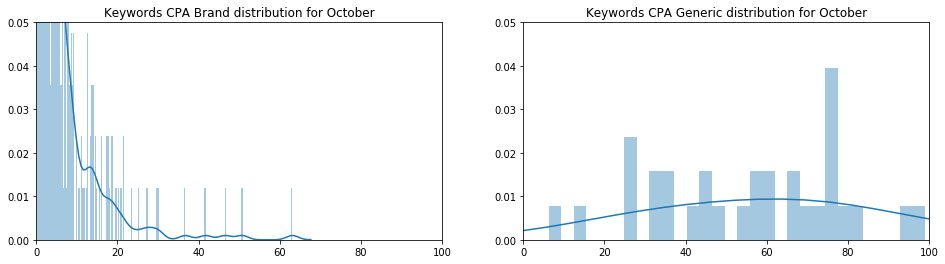

In [14]:
# visualize what we have done with data
plot_column = 'CPA'
bins = 200
x_axis_range = (0, 100)
y_axis_range = (0, 0.05)


fig, ax = plt.subplots(1, len(labels), figsize=(16, 4))

for i, cpa_arr in enumerate(cpa_arr_list):
    sns.distplot(cpa_arr, bins=bins, ax=ax[i])\
        .set_title(f'Keywords {plot_column} {labels[i]} distribution for {month}') 

    ax[i].set(xlim=x_axis_range, ylim=y_axis_range)


#### Lets calculate statistics
 <br>Null hypothesis: our samples are taken from the same population distribution.
 <br>If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis.
 <br>P-value is confidence of null hypothesis.

In [15]:
# conduct tests for processed data
for i, j in combinations(range(len(labels)), 2):
    total_results_dict[month][f'{labels[i]} vs {labels[j]}'] = {}
    print(f'Comparison of {labels[i]} vs {labels[j]}')
    
    print('Levene Test of equality of variances')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.levene(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Wilcoxon Rank-Sum Test')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'] = \
        ss.stats.wilcoxon(cpa_arr_list[i][:min_len-1], cpa_arr_list[j][:min_len-1], correction=True)
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'][1], 2))
    
    print('Kolmogorov-Smirnov Test on 2 samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.ks_2samp(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Kruskal-Wallis H-test for independent samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.kruskal(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
     
    
    
    print('#'*100)
print(total_results_dict)

Comparison of Brand vs Generic
Levene Test of equality of variances
0.0
Wilcoxon Rank-Sum Test
0.0
Kolmogorov-Smirnov Test on 2 samples
0.0
Kruskal-Wallis H-test for independent samples
0.0
####################################################################################################
{'October': {'Brand vs Generic': {'Levene': KruskalResult(statistic=99.74477552224668, pvalue=1.7335732970358343e-23), 'Wilcoxon': WilcoxonResult(statistic=3.0, pvalue=4.6581918913568113e-08)}}, 'September': {}, 'August': {}}


### Comparison for September

#### Lets prepare our dataframes to get tested

In [16]:
dfs = [df_09_brand, df_09_generic]
labels = ['Brand', 'Generic']
month = 'September'
cpa_arr_list = []

min_len = len(min(dfs, key=len))

for i in range(len(dfs)):
    cpa_arr_list.append(dfs[i]['CPA'].values)
    print(f'Dataset size for {month}, {labels[i]} = {len(cpa_arr_list[i])} ')


Dataset size for September, Brand = 345 
Dataset size for September, Generic = 78 


#### Visualize CPAs

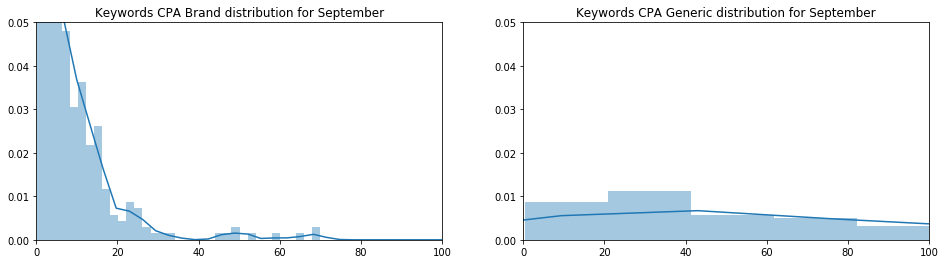

In [17]:
# visualize what we have done with data
plot_column = 'CPA'
bins = 200
x_axis_range = (0, 100)
y_axis_range = (0, 0.05)


fig, ax = plt.subplots(1, len(labels), figsize=(16, 4))

for i, cpa_arr in enumerate(cpa_arr_list):
    sns.distplot(cpa_arr, bins=bins, ax=ax[i])\
        .set_title(f'Keywords {plot_column} {labels[i]} distribution for {month}') 

    ax[i].set(xlim=x_axis_range, ylim=y_axis_range)


#### Lets calculate statistics
 <br>Null hypothesis: our samples are taken from the same population distribution.
 <br>If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis.
 <br>P-value is confidence of null hypothesis.

In [18]:
# conduct tests for processed data
for i, j in combinations(range(len(labels)), 2):
    total_results_dict[month][f'{labels[i]} vs {labels[j]}'] = {}
    print(f'Comparison of {labels[i]} vs {labels[j]}')
    
    print('Levene Test of equality of variances')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.levene(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Wilcoxon Rank-Sum Test')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'] = \
        ss.stats.wilcoxon(cpa_arr_list[i][:min_len-1], cpa_arr_list[j][:min_len-1], correction=True)
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'][1], 2))
    
    print('Kolmogorov-Smirnov Test on 2 samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.ks_2samp(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Kruskal-Wallis H-test for independent samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.kruskal(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
     
    
    
    print('#'*100)
print(total_results_dict)

Comparison of Brand vs Generic
Levene Test of equality of variances
0.0
Wilcoxon Rank-Sum Test
0.0
Kolmogorov-Smirnov Test on 2 samples
0.0
Kruskal-Wallis H-test for independent samples
0.0
####################################################################################################
{'October': {'Brand vs Generic': {'Levene': KruskalResult(statistic=99.74477552224668, pvalue=1.7335732970358343e-23), 'Wilcoxon': WilcoxonResult(statistic=3.0, pvalue=4.6581918913568113e-08)}}, 'September': {'Brand vs Generic': {'Levene': KruskalResult(statistic=139.2361196497404, pvalue=3.91074840002006e-32), 'Wilcoxon': WilcoxonResult(statistic=155.0, pvalue=8.242333894404524e-12)}}, 'August': {}}


### Comparison for August

#### Lets prepare our dataframes to get tested

In [19]:
dfs = [df_08_brand, df_08_generic]
labels = ['Brand', 'Generic']
month = 'August'
cpa_arr_list = []

min_len = len(min(dfs, key=len))

for i in range(len(dfs)):
    cpa_arr_list.append(dfs[i]['CPA'].values)
    print(f'Dataset size for {month}, {labels[i]} = {len(cpa_arr_list[i])} ')


Dataset size for August, Brand = 210 
Dataset size for August, Generic = 64 


#### Visualize CPAs

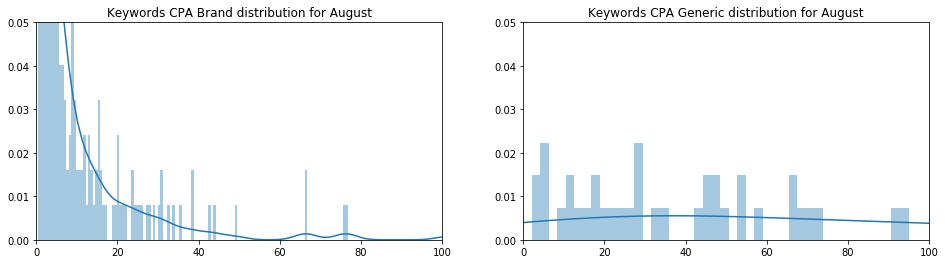

In [20]:
# visualize what we have done with data
plot_column = 'CPA'
bins = 200
x_axis_range = (0, 100)
y_axis_range = (0, 0.05)


fig, ax = plt.subplots(1, len(labels), figsize=(16, 4))

for i, cpa_arr in enumerate(cpa_arr_list):
    sns.distplot(cpa_arr, bins=bins, ax=ax[i])\
        .set_title(f'Keywords {plot_column} {labels[i]} distribution for {month}') 

    ax[i].set(xlim=x_axis_range, ylim=y_axis_range)


#### Lets calculate statistics
 <br>Null hypothesis: our samples are taken from the same population distribution.
 <br>If we observe a large p-value, for example greater than 0.05 or 0.1 then we cannot reject the null hypothesis.
 <br>P-value is confidence of null hypothesis.

In [21]:
# conduct tests for processed data
for i, j in combinations(range(len(labels)), 2):
    total_results_dict[month][f'{labels[i]} vs {labels[j]}'] = {}
    print(f'Comparison of {labels[i]} vs {labels[j]}')
    
    print('Levene Test of equality of variances')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.levene(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Wilcoxon Rank-Sum Test')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'] = \
        ss.stats.wilcoxon(cpa_arr_list[i][:min_len-1], cpa_arr_list[j][:min_len-1], correction=True)
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Wilcoxon'][1], 2))
    
    print('Kolmogorov-Smirnov Test on 2 samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.ks_2samp(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
    
    print('Kruskal-Wallis H-test for independent samples')
    total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'] = \
        ss.stats.kruskal(cpa_arr_list[i], cpa_arr_list[j])
    print(round(total_results_dict[month][f'{labels[i]} vs {labels[j]}']['Levene'][1], 2))
     
    
    
    print('#'*100)
print(total_results_dict)

Comparison of Brand vs Generic
Levene Test of equality of variances
0.0
Wilcoxon Rank-Sum Test
0.0
Kolmogorov-Smirnov Test on 2 samples
0.0
Kruskal-Wallis H-test for independent samples
0.0
####################################################################################################
{'October': {'Brand vs Generic': {'Levene': KruskalResult(statistic=99.74477552224668, pvalue=1.7335732970358343e-23), 'Wilcoxon': WilcoxonResult(statistic=3.0, pvalue=4.6581918913568113e-08)}}, 'September': {'Brand vs Generic': {'Levene': KruskalResult(statistic=139.2361196497404, pvalue=3.91074840002006e-32), 'Wilcoxon': WilcoxonResult(statistic=155.0, pvalue=8.242333894404524e-12)}}, 'August': {'Brand vs Generic': {'Levene': KruskalResult(statistic=99.63044352831932, pvalue=1.8365948815229827e-23), 'Wilcoxon': WilcoxonResult(statistic=138.0, pvalue=2.637746398382706e-09)}}}
